## PCA

PCA or Principal Components Analysis is an unsupervised learning method, where the importance of predictors are quantified by their comtribution to the total variance. In PCA, a design matrix $X$ is broken down via single value decomposition into $UDV^\prime$. The vectors within this singular value decomposition form the basis for a reparametrization into a new dimension where the predicitors maximize the explained variation.

In order to perform the PCA on X, one should center the data. For PCA to work, the data should be centered about zero by taking $X-\bar{X}$ where each column is centered by its mean. Additionally, for best performance the data should receive a standard scaling by the standard deviation giving a new design $X^* = \frac{X- \bar{x}}{d(X)}$. The following image illustrates the process of rotating the vectors for PCA.

<p align="center">
    <img src="PCA.png" width="500">
</p>

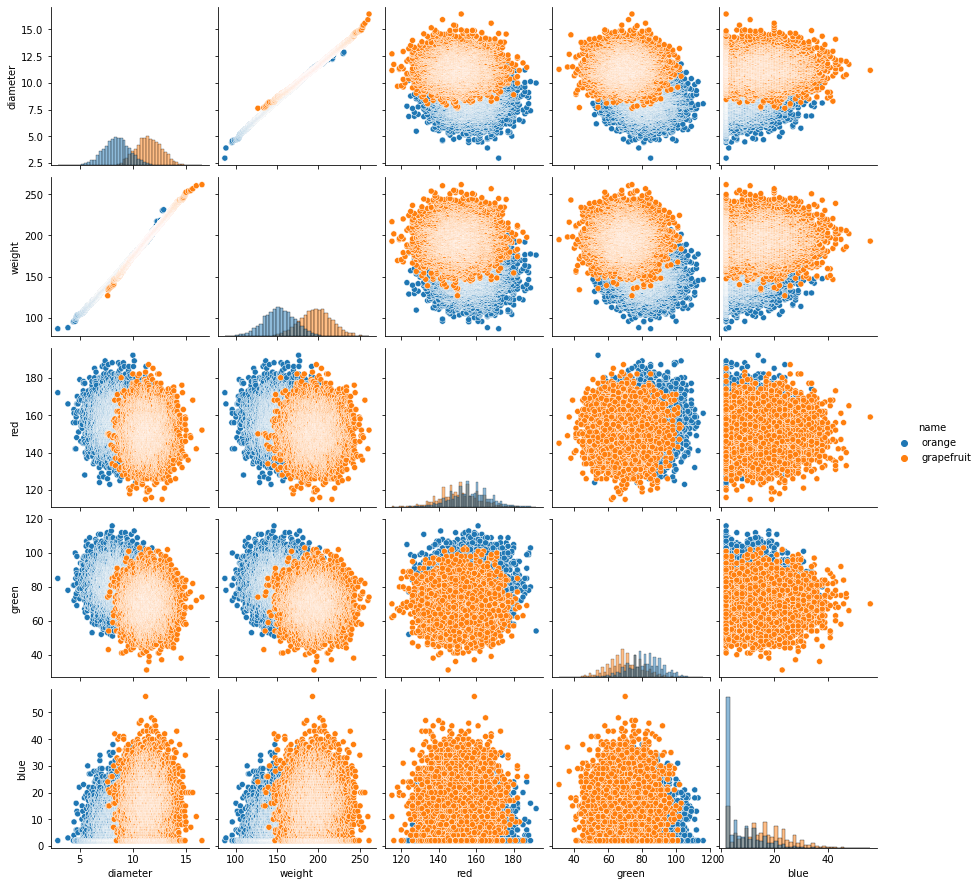

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import sklearn
from sklearn import preprocessing
import tensorflow as tf
np.random.seed(99)

df = pd.read_csv("citrus.csv")
y = df.name.values
X = df.drop(columns = ["name"]).astype("float").values
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
sns.pairplot(df, hue="name",diag_kind="hist")

To demonstrate the clustering abilites of PCA, I have chosen to use the dataset citrus found in the citrus.csv file within this folder. The data is originally obtained from Kaggle.com and consists of 7500 fruits which are labeled as either grapefruit or orange. The predictor variables consist of five continuous metrics: diameter, weight, red, green, and blue. The red, green, and blue values refer to the color of the fruit and the diameter and weight values correspond to the size of the fruit. 

In [29]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

print("Variance ratio: ", pca.explained_variance_ratio_)

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print("Percent of Explained Variance: ", per_var)



Variance ratio:  [5.10566619e-01 1.82894700e-01 1.57194156e-01 1.49244850e-01
 9.96755560e-05]
Percent of Explained Variance:  [5.106e+01 1.829e+01 1.572e+01 1.492e+01 1.000e-02]


For each transformed vector PCA, there is a percentage of the total variance explained (adding to 100%). This is determined by the magnitude of the singular value associated with each PCA vector relative to the others. 

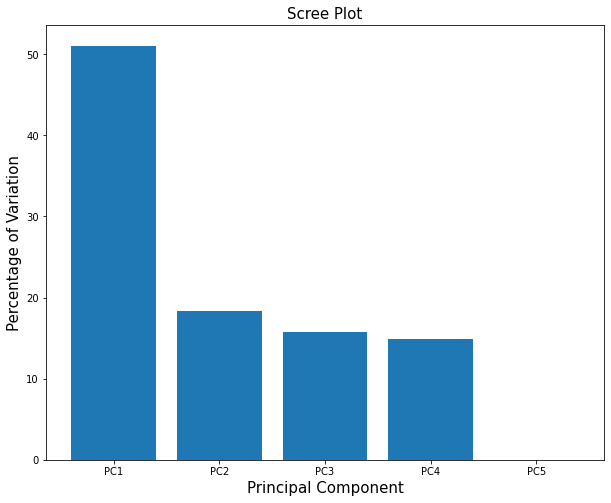

In [30]:
labels = [f"PC{i}" for i in range(1,len(per_var)+1)]

plt.figure(figsize = (10, 8))
plt.bar(x = range(1,len(per_var)+1), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

Above is a scree plot which helps illustrate the total variation associated with each PCA vector. The first vector is the most significant in terms of variance explaining $\approx$51% of the total variation while the last PCA vector explains only 1% of the total variation. In this way we can perform dimensionality reduction on the data and reduct the determining features into two or three significant vectors.

In [31]:
features = list(set(df.columns) - {"name"})

pd.DataFrame(data = pca.components_, columns = labels, index = features)

,PC1,PC2,PC3,PC4,PC5
green,-0.585840,-0.584250,0.229514,0.373967,-0.350593
diameter,0.163868,0.166759,0.970557,-0.035415,0.045874
red,-0.300933,-0.306612,0.055957,-0.151943,0.888375
weight,-0.193228,-0.197227,0.046994,-0.914218,-0.292849
blue,-0.708549,0.705644,-0.001885,-0.003544,0.003040


Above the table indicates what weighting of the original predictor makes up the new PCA predictor. The green shade for example is weighted by -.58 to make up PC1 and PC2.

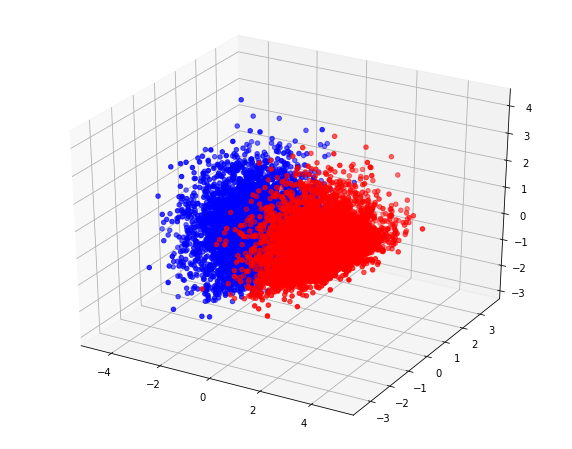

In [37]:
pca_data = pca.transform(X)

pca_df = pd.DataFrame(pca_data, columns = labels)

projected_df = pd.concat([pca_df, df.name], axis = 1)

targets = ["orange", "grapefruit"]
colors = ["red", "blue"]

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
for target, color in zip(targets, colors):
    temp_df = projected_df[projected_df['name'] == target]
    ax.scatter3D(temp_df["PC1"],
                temp_df["PC2"],
                temp_df["PC3"],
                c = color)
plt.show()

The final plot illustrates the utility of PCA for unsupervised clustering. By reducing the dimensionality of the data, we can uncover some of the clustering nature to the data encoded in its underlying structure. Above, the blue coloring refers to the grapefruit labeled points and the red coloring refers to the orange labeled points. There is a clear delineation in the data that is not demonstrated in any of the two factor plots at the top of the page. In addition to being useful for unsupervised clustering, PCA is also useful in statistics for feature selection in regression to reduce the numberof predictors. 